<a href="https://colab.research.google.com/github/mijinatdiscovery/jupyter-notebooks/blob/main/Text_Clustering_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import get_data_home

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(1)

# Clustering  

In this notebook you will apply both k-means and hierarchical clustering. For the k-means task, you will be clustering amazon food reviews.


- [Part 1](#part1)- K-means clustering for amazon food reviews
- [Part 2](#part2)- Hierarchical clustering


[Back to top](#Index:)

<a id='part1'></a>

### Part 1 - K-means clustering for Amazon Food Reviews

In this part of the assignment youl will be clustering reviews of food from amazon. The data span a period of more than 10 years, up to October 2012. This task will consist of loading the data, vectorizing the text input and then fitting k-means model to the data to gain insights.

First of all, load the "Reviews.csv" dataset.

In [4]:
dataset=pd.read_csv("Reviews.csv")

Remove any rows of the dataframe that include NaNs using `.dropna()`. As the dataset is large, we will work with a subset of it so use `.sample()` take a sample of 10000 rows.

In [5]:
dataset = dataset.dropna()
dataset = dataset.sample(10000)

Next, use `.head` to visulise the dataframe.

In [6]:
print(dataset.head(4))

          Id   ProductId          UserId                 ProfileName  \
71848  71849  B0018CFRX4  A2476I00PM5XJ2  Wil McMilan "submarine MD"   
77603  77604  B001LG940E  A2W4014S06NAIT             Fathom "Fathom"   
30638  30639  B001FB6AHK   AW71UZ8XFGGGM                  G. Prosser   
9157    9158  B006N3IG4K  A3M2ESK4WEGOCS                   P. Donahy   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
71848                     0                       1      1  1287273600   
77603                     0                       0      3  1236556800   
30638                     0                       0      5  1326240000   
9157                      0                       0      5  1326585600   

                   Summary                                               Text  
71848  Not worth the price  The price of this cat food is far above the va...  
77603  A little lackluster  This flavor wasn't as sweet as the strawberry ...  
30638      VERY good stuff  

 Next we want to create a variable `texts` which is only the `'Text'` Column of the dataset.

In [7]:
texts = dataset['Text']

We will use the `TfidfVectorizer` to turn the strings into a vectorized format.

This method allows us to convert the text into a vectorized format that the computer can understand. This particular mehtod also weights for word frequency, so we don't put too much emphasis on common words such as "the", "a" and "and".

You can read more about this method in the sci-kit learn documentation.

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(texts) # convert our texts into vectors


Below, use the elbow curve method with cluster up to 15 to decide how many clusters you will use.

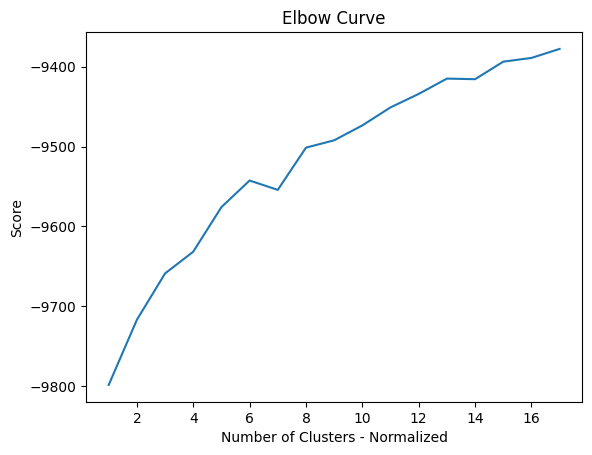

In [9]:
N = range(1, 18)
kmeans = []
for i in N:
    kmeans.append(KMeans(n_clusters=i, n_init='auto'))

score = []
# Fit the models and calculate the score for each
for model in kmeans:
    model.fit(X)
    score.append(model.score(X))

plt.plot(N,score)
plt.xlabel('Number of Clusters - Normalized')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

How many clusters did you decide to use and Why?

**your answer here**

Answer: The correct answer is 5 but as this curve doesnt have a clear elbow point accept any point that looks a bit like an inflection e.g 5, 14

Now fit a Kmeans model for your chosen number of clusters

In [10]:

number_of_clusters = 5

kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

We will now make a wordcloud of the most common words in each cluster. For this part you will need to install the wordcloud package on your computer. To do this go to your command line and enter the command `pip install wordcloud`.

In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


The two functions below will allow you to plot the wordclouds easily

In [12]:


# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

Use the code cell below to create wordclouds for each cluster. What are the significant clusters you see?

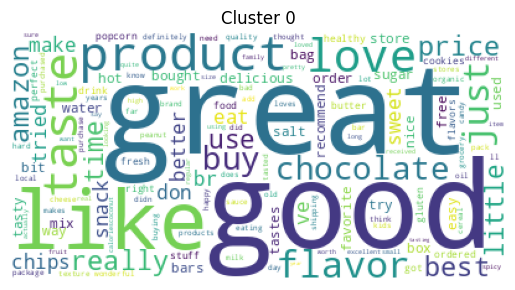

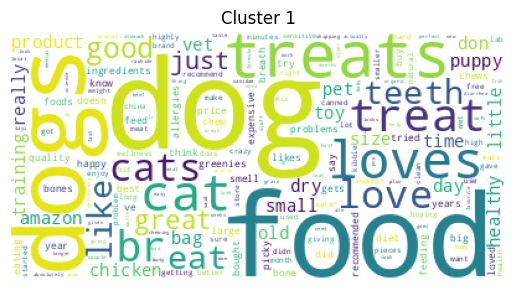

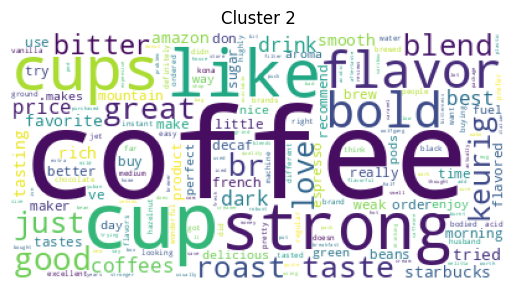

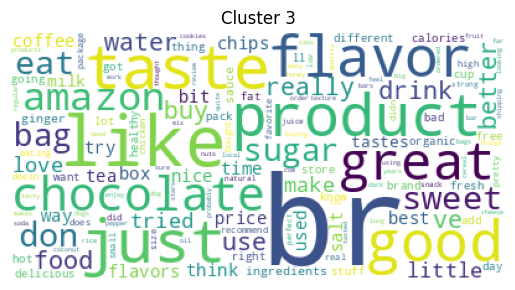

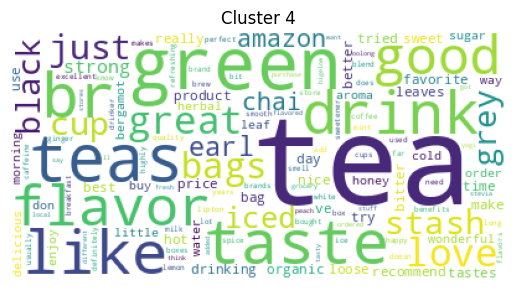

In [15]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)



[Back to top](#Index:)

<a id='part2'></a>

### Part 2 - Hierarchical Clustering

In this part of the assignment you will be clustering Airbnb data from new york. This dataset includes the following factors:

- price - price in dollars
- minimum_nights - the minimum number of nights a guest can stay
- number_of_reviews - the number of reviews the listing has
- reviews_per_month - the number of reviews it has got per month
- calculated_host_listings_count - the number of listings the host has
- availability_365 - how many days a year it is available

First of all load the `AB_NYC.csv` dataset and use `.head()` to see what it looks like.

In [16]:
data = pd.read_csv('AB_NYC.csv')
data.head()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,140,2,37,2.64,1,157
1,90,3,8,0.32,1,0
2,225,2,3,0.09,1,88
3,47,1,18,0.80,1,0
4,155,20,25,1.06,2,62


Next use `normalize` to normalize the data. You'll need to pass the argument `axis=1` to the normalize function so it normalizes each column seperately.

In [17]:
from sklearn.preprocessing import normalize


data_scaled = normalize(data, axis=1)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
print(data_scaled)


        price  minimum_nights  number_of_reviews  reviews_per_month  \
0    0.655395        0.009363           0.173211           0.012359   
1    0.995457        0.033182           0.088485           0.003539   
2    0.931192        0.008277           0.012416           0.000372   
3    0.933370        0.019859           0.357461           0.015887   
4    0.911779        0.117649           0.147061           0.006235   
..        ...             ...                ...                ...   
995  0.329213        0.005065           0.263370           0.008610   
996  0.896713        0.019927           0.039854           0.011956   
997  0.766965        0.009587           0.397863           0.004841   
998  0.379720        0.076454           0.005097           0.000153   
999  0.174389        0.006976           0.045341           0.000767   

     calculated_host_listings_count  availability_365  
0                          0.004681          0.734978  
1                          0.011061

Next make a dendrogram from the data.

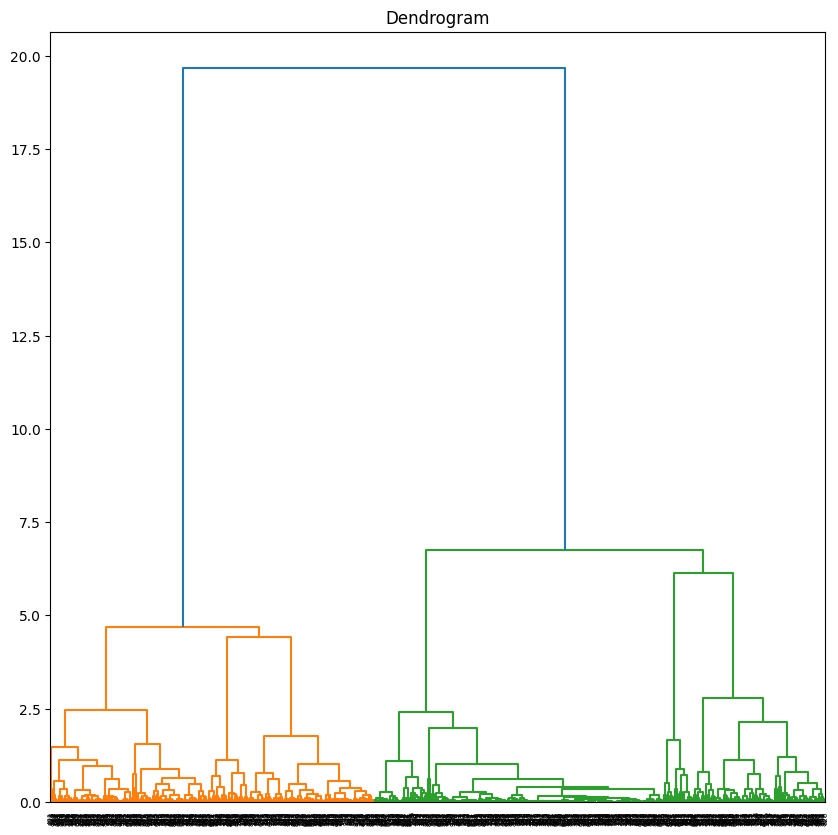

In [18]:
import matplotlib as mpl
import scipy.cluster.hierarchy as shc

#
plt.figure(figsize=(10, 10))
plt.title("Dendrogram")

dend = shc.dendrogram(Z =shc.linkage(data_scaled, method='ward'))
#

How many clusters would you choose and why?

2 clusters as that is the longest part of the dendrogram

Now use `AgglomerativeClustering` to create your selected number of clusters. What distance metric would you use and why?

The best distance metric to use is euclidean

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
_ = cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Use the cell below to visulise the clusters


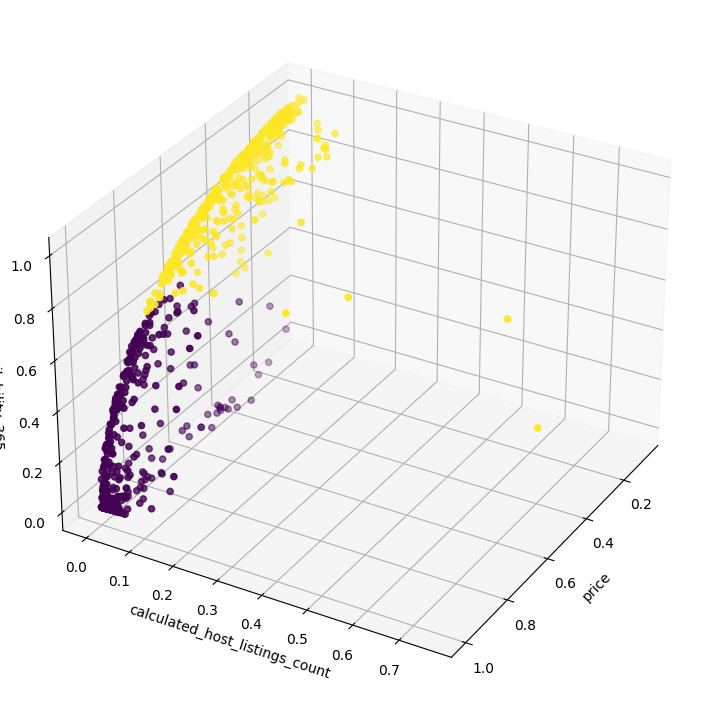

Text(0.5, 0, 'availability_365')

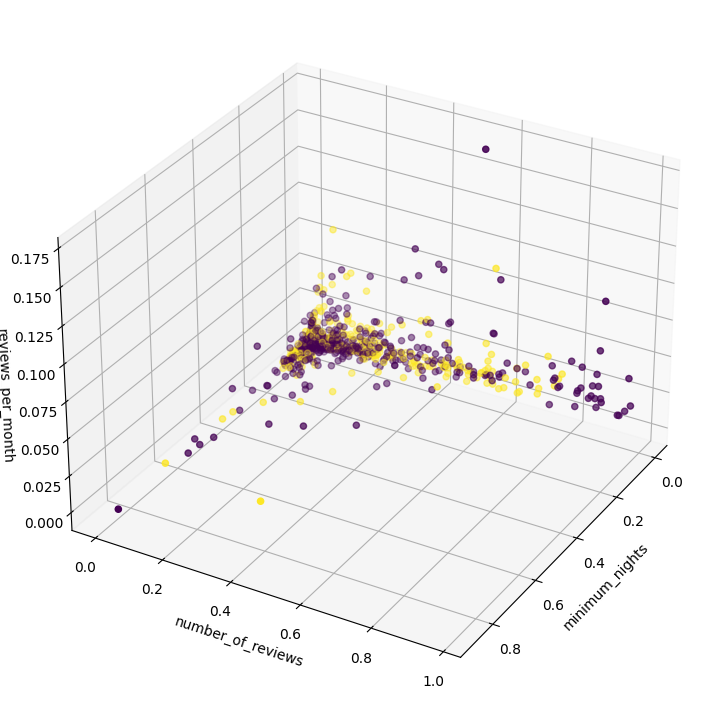

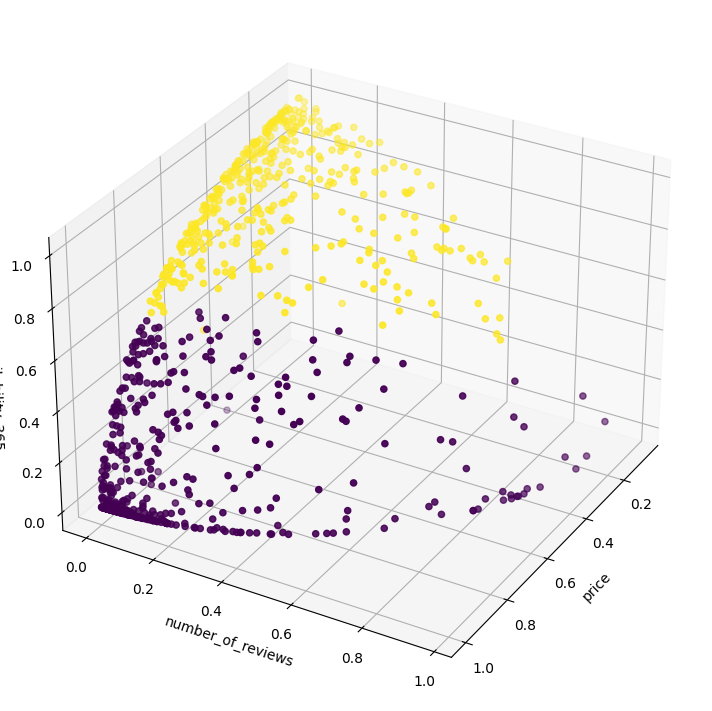

In [20]:


fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')
ax.scatter3D(data_scaled['price'],data_scaled['calculated_host_listings_count'
             ],data_scaled['availability_365'], c=cluster.labels_)
ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('calculated_host_listings_count')
ax.set_zlabel('availability_365')
plt.show()

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['minimum_nights'], data_scaled['number_of_reviews'
             ],data_scaled['reviews_per_month'], c=cluster.labels_)
ax.view_init(30,30)
ax.set_xlabel('minimum_nights')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('reviews_per_month')

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['price'], data_scaled['number_of_reviews'
             ],data_scaled['availability_365'], c=cluster.labels_)

ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('availability_365')

add a new column to your data dataframe called `cluster` for the cluster labels. Then use the pandas `groupby()` function to calculate the mean of each cluster.

In [21]:
data['cluster'] = cluster.labels_
print(data.groupby('cluster').mean())

              price  minimum_nights  number_of_reviews  reviews_per_month  \
cluster                                                                     
0        164.714777        4.896907          22.209622           1.137955   
1        114.019139        8.564593          38.799043           1.784641   

         calculated_host_listings_count  availability_365  
cluster                                                    
0                              1.589347         30.460481  
1                              6.763158        247.622010  


How would you describe the different clusters? What is different about them?

**your answer here**

A: Students should pick up on the fact the biggest differences come in the avalibility, price and host listing counts. They should discuss how they might categorize these two clusters.
